In [1]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from matplotlib import pyplot
import pandas as pd

In [2]:
def get_dataset(file, n_features):
    df = pd.read_csv(file, sep=',', index_col=0)
    X = df.iloc[:, :n_features]
    y = df.iloc[:, n_features]
    return X, y

In [3]:
def get_models(svm_c, n_features):
    models = dict()
    for i in range(2, n_features):
        rfe = RFE(estimator=SVC(kernel='linear', C=svm_c), n_features_to_select=i)
        model = SVC(kernel='linear', C=svm_c)
        models[str(i)] = Pipeline(steps=[('s',rfe), ('m',model)])
    return models

In [4]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [5]:
def run_rfe(models, X, y):    
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    return results, names

In [6]:
def selected_features(svm_c, n, X, y):
    rfe = RFE(estimator=SVC(kernel='linear', C=svm_c), n_features_to_select=n)
    rfe.fit(X,y)
    cols = []
    for i in range(X.shape[1]):
        # print('Column: %d, Selected %s, Rank: % .3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        if rfe.support_[i]:
            cols.append(X.columns[i])
    return cols

In [7]:
file = '~/ER-RFE.csv'
X,y = get_dataset(file, 425)

In [8]:
models = get_models(8,425)

In [9]:
results, names = run_rfe(models, X, y)

>2 0.679 (0.043)
>3 0.670 (0.045)
>4 0.681 (0.058)
>5 0.665 (0.073)
>6 0.674 (0.069)
>7 0.658 (0.076)
>8 0.649 (0.083)
>9 0.647 (0.055)
>10 0.640 (0.060)
>11 0.642 (0.053)
>12 0.645 (0.059)
>13 0.654 (0.059)
>14 0.660 (0.054)
>15 0.663 (0.061)
>16 0.672 (0.063)
>17 0.656 (0.072)
>18 0.656 (0.066)
>19 0.658 (0.048)
>20 0.660 (0.052)
>21 0.662 (0.064)
>22 0.647 (0.067)
>23 0.660 (0.059)
>24 0.676 (0.060)
>25 0.667 (0.060)
>26 0.681 (0.064)
>27 0.667 (0.062)
>28 0.676 (0.067)
>29 0.669 (0.074)
>30 0.667 (0.068)
>31 0.665 (0.070)
>32 0.654 (0.062)
>33 0.661 (0.073)
>34 0.669 (0.077)
>35 0.669 (0.063)
>36 0.678 (0.059)
>37 0.679 (0.065)
>38 0.665 (0.066)
>39 0.669 (0.074)
>40 0.669 (0.063)
>41 0.672 (0.059)
>42 0.678 (0.063)
>43 0.676 (0.063)
>44 0.683 (0.069)
>45 0.692 (0.076)
>46 0.690 (0.074)
>47 0.695 (0.070)
>48 0.699 (0.078)
>49 0.692 (0.074)
>50 0.694 (0.075)
>51 0.686 (0.075)
>52 0.688 (0.077)
>53 0.674 (0.072)
>54 0.674 (0.073)
>55 0.687 (0.073)
>56 0.676 (0.079)
>57 0.683 (0.076)


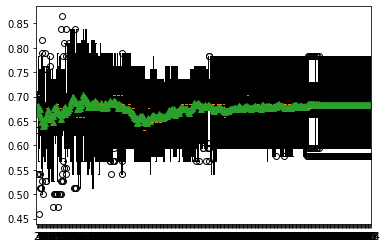

In [10]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [11]:
selected_features(8, 47, X, y)

['A1BG',
 'ACE2',
 'ACHE',
 'AMTN',
 'ANGPTL2',
 'ANGPTL3',
 'C5',
 'CCL15',
 'CCL28',
 'CD248',
 'CFHR1',
 'COL11A1',
 'COL5A2',
 'COL9A3',
 'COMP',
 'CTRL',
 'CXCL1',
 'CYTL1',
 'DMP1',
 'DNASE1',
 'EGFL6',
 'FGFBP1',
 'GDF15',
 'GNLY',
 'IL16',
 'IL1A',
 'IL26',
 'IL27',
 'IL6R',
 'IMPG1',
 'INSL3',
 'KLK10',
 'KLK4',
 'KLK5',
 'LAMA3',
 'MATN1',
 'MEP1A',
 'MMP3',
 'NOG',
 'PCSK9',
 'PRR4',
 'PRSS8',
 'RNASE2',
 'SCUBE1',
 'SLIT1',
 'TINAG',
 'TNFRSF11B']